# FITS 

In this tutorial we demostrate how to retrieve data from FITS and also how to find sites and data collection methods.

## Set Up 

###### Import packages

In [1]:
import json # package to read json code
import requests # package to get data from an API
import pandas as pd # package for data frames
import datetime # package to deal with time
import matplotlib.pyplot as plt #package to do plotting

## Basic Functionality - Get Observation Data

Set URL

In [2]:
base_url = 'https://fits.geonet.org.nz/'
endpoint = 'observation'

Set query parameters

We need to set
- siteID, where data are collected
- typeID, type of data collected

We can optionally set
- methodID, how data were collected. This potentially allows you to distinguish data with different collection methods.
- days, the last n days of data. This is counted back from today. 

### Volcano data example

Retrieve temperature data collected at the outlet of Ruapehu's crater lake. This site collects data automatically so there are quite a lot of observations. So we'll only get data from the last 100 days.

In [3]:
siteID = 'RU001' #outlet of Ruapehu's crater lake
typeID = 't' #temperature
days = '100' #last 100 days of data

In [4]:
url = base_url + endpoint+'?typeID=' + typeID + '&siteID=' + siteID + '&days=' + days
print (url)

https://fits.geonet.org.nz/observation?typeID=t&siteID=RU001&days=100


Use the url specifying the data request in pandas read_csv function. Tell pandas to interpret columns that look like dates as dates, and set the index to the date-time column

In [5]:
df = pd.read_csv(url, parse_dates=True, index_col='date-time')

Head the dataframe to check the first 5 rows

In [6]:
df.head()

,t (C),error (C)
date-time,,
2023-01-18 04:45:00+00:00,33.73,0.0
2023-01-18 05:00:00+00:00,33.46,0.0
2023-01-18 05:15:00+00:00,33.53,0.0
2023-01-18 06:15:00+00:00,32.84,0.0
2023-01-18 06:45:00+00:00,32.71,0.0


Make a basic plot directly using the pandas plot function

<Axes: xlabel='date-time'>

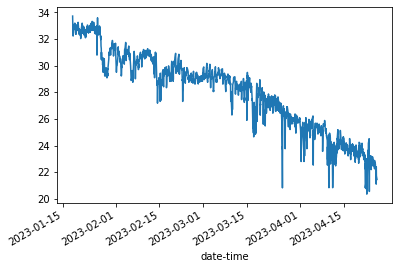

In [7]:
df[' t (C)'].plot()

#### Using methodID

Most data from the site is collected automatically and the methodID is logic.
A small amount of data are collected manually and the methodID is thermcoup


In [8]:
methodIDa = 'logic'
methodIDm = 'thermcoup'

In [9]:
url = base_url + endpoint+'?typeID=' + typeID + '&siteID=' + siteID + '&days=' + days + '&methodID=' + methodIDa
print (url)

https://fits.geonet.org.nz/observation?typeID=t&siteID=RU001&days=100&methodID=logic


In [10]:
dfa = pd.read_csv(url, parse_dates=True, index_col='date-time')

In [11]:
dfa.head()

,t (C),error (C)
date-time,,
2023-01-18 04:45:00+00:00,33.73,0
2023-01-18 05:00:00+00:00,33.46,0
2023-01-18 05:15:00+00:00,33.53,0
2023-01-18 06:15:00+00:00,32.84,0
2023-01-18 06:45:00+00:00,32.71,0


In [12]:
url = base_url + endpoint+'?typeID=' + typeID + '&siteID=' + siteID + '&days=' + days + '&methodID=' + methodIDm
print (url)

https://fits.geonet.org.nz/observation?typeID=t&siteID=RU001&days=100&methodID=thermcoup


In [13]:
dfm = pd.read_csv(url, parse_dates=True, index_col='date-time')

In [14]:
dfm.head()

,t (C),error (C)
date-time,,
2023-01-26 00:00:00+00:00,30.8,2.2
2023-03-15 00:00:00+00:00,25.9,2.2


Plot automatically collected data as a line, and manually collected as symbols. This allows us to compare data
collected by both methods.

<Axes: xlabel='date-time'>

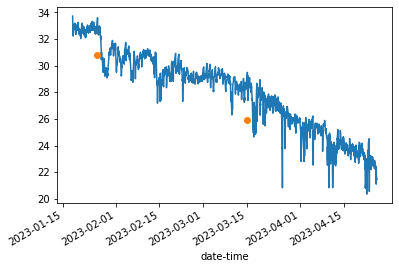

In [15]:
fig,ax = plt.subplots(1,1)
dfa[' t (C)'].plot(ax=ax)
dfm[' t (C)'].plot(ax=ax, marker='o', linestyle='none')

### GNSS data example

Retrieve daily GNSS positions from Makorori (MAKO), a site near Gisborne. You'll notice that these data have non-zero errors that were estimated when the daily positions were calculated.

In [16]:
siteID = 'MAKO' #Makorori
typeID = 'e' #east component of deformation

In [17]:
url = base_url + endpoint+'?typeID=' + typeID + '&siteID=' + siteID
print (url)

https://fits.geonet.org.nz/observation?typeID=e&siteID=MAKO


Use the url specifying the data request in pandas read_csv function. Tell pandas to interpret columns that look like dates as dates, ans set the index to the date-time column

In [18]:
df = pd.read_csv(url, parse_dates=True, index_col='date-time')

Head the dataframe to check the first 5 rows

In [19]:
df.head()

,e (mm),error (mm)
date-time,,
2010-11-10 11:59:00+00:00,20.66,1.54
2010-11-11 11:59:00+00:00,19.65,1.77
2010-11-12 11:59:00+00:00,20.54,1.80
2010-11-13 11:59:00+00:00,19.17,1.60
2010-11-14 11:59:00+00:00,19.59,2.25


Make a basic plot directly using the pandas plot function

<Axes: xlabel='date-time'>

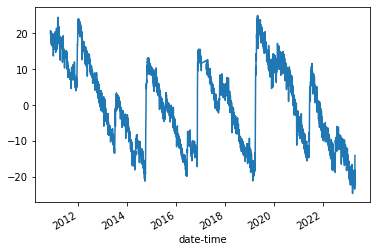

In [20]:
df[' e (mm)'].plot()

## Additional Functionality - Find Sites

You can use the FITS API to find sites in a particular area. https://fits.geonet.org.nz/api-docs/endpoint/site We use a ploygon around Ruapehu.

In [21]:
base_url = 'https://fits.geonet.org.nz/'
endpoint = 'site'
url = base_url + endpoint

In [22]:
poly = 'POLYGON((175.665 -39.381,175.665 -39.181,175.465 -39.181,175.465 -39.381,175.665 -39.381))'
parameters ={'within':poly}

We use `requests.get` to get the data using the URL and the polygon parameters

In [23]:
sites = requests.get(url, params=parameters)
print (sites) # a 200 response is okay

data = sites.json()['features'] # we want the features information

<Response [200]>


Create a dataframe to store the site information

In [24]:
ruapehu = pd.DataFrame() #empty dataframe

We put this data into a dataframe

In [25]:
for i, val in enumerate(data):
    geometry = val['geometry']
    lon = geometry['coordinates'][0]
    lat = geometry['coordinates'][1]
    properties = val['properties']
    siteID = properties['siteID']
    height = properties['height']
    name = properties['name']
    #dictionary containing the various data
    dic = {'siteID': siteID, 'lon': lon, 'lat': lat, 'height': height, 'name': name}
    #make a temprary dataframe from the dictionary
    temp = pd.DataFrame(dic, index=[i])
    #concatenate with dataframe containing site information
    ruapehu = pd.concat([ruapehu, temp])

In [26]:
ruapehu

,siteID,lon,lat,height,name
0,RU002,175.564369,-39.281281,2529.000,"Ruapehu Crater Lake, Whole Lake"
1,RUD02,175.556380,-39.237150,1663.000,Iwikau Village
2,RU010,175.542240,-39.199839,1161.000,Chateau Observatory
3,RU020,175.527965,-39.224927,1280.000,"Ruapehu, Silica Rapids"
4,TO051,175.604190,-39.200689,1230.000,"Tongariro, Lower Tama Lake"
5,RU001A,175.565400,-39.283500,2529.000,Ruapehu Crater Lake Outlet
6,VGTR,175.548312,-39.298416,2085.060,Turoa
7,RU004,175.564900,-39.279800,2529.000,Ruapehu Crater Lake North Vent
8,RU001B,175.565400,-39.283500,2529.000,Ruapehu Crater Lake Outlet
9,RUD01,175.608700,-39.277500,1748.000,Tukino Skifield


## Additional Functionality - Find Data Collection Methods

You can use the FITS API to find data collection methods for a particular data type. https://fits.geonet.org.nz/api-docs/endpoint/method We use it to find the methods for temperature data.

In [27]:
base_url = 'https://fits.geonet.org.nz/'
endpoint = 'method'
url = base_url + endpoint

In [28]:
#Set query parameters
parameters ={"typeID": 't'}

#Get data
request = requests.get(url, params=parameters)

#Unpack data
data = request.json()['method']

In [29]:
t_methods = pd.DataFrame()
    
#add data to the data frame
for i, val in enumerate(data):
    methodID = val['methodID']
    name = val['name']
    description = val['description']
    reference = val['reference']
    #append these to t_methods
    dic = {'name': name, 'methodID': methodID, 'description': description, 'reference':reference}
    #make a temprary dataframe from the dictionary
    temp = pd.DataFrame(dic, index=[i])
    #concatenate with dataframe containing method information
    t_methods = pd.concat([t_methods, temp])

In [30]:
t_methods

,name,methodID,description,reference
0,thermometer,therm,mercury thermometer,http://en.wikipedia.org/wiki/Thermometer
1,thermocouple,thermcoup,thermocouple thermometer,http://en.wikipedia.org/wiki/Thermocouple
2,therminfrared,therminfra,infrared thermometer,http://en.wikipedia.org/wiki/Infrared_thermometer
3,thermflir,flir,FLIR camera,http://en.wikipedia.org/wiki/Forward_looking_i...
4,weather station,weathersta,An instrument recording different types of atm...,https://en.wikipedia.org.nz/wiki/Weather_station
5,integrated circuit and data logger,logic,"an integrated circuit temperature sensor, ofte...",http://www.ti.com/product/LM35
6,thermocouple and data logger,logthermcoup,"a thermocouple, recorded by a data logger",https://en.wikipedia.org/wiki/Thermocouple
7,platinum resistance thermometer and data logger,logprt,"a platinum resistance thermometer, recorded by...",https://en.wikipedia.org/wiki/Resistance_therm...
8,satellite thermal imagery,sattherm,processed thermal image from a satellite,https://en.wikipedia.org/wiki/Satellite_imagery
